# Bracketing

This is a technique to determine the local minimum within an interval. In the event a derivative does not exist, this type of technique works.

## Utility Functions

Below will setup a viewable plotting function.

In [1]:
using Plots 

function plot_f(f, x, int_x, int_y)
    y = f.(x)
    plot(x, y)
    
    n_pts = length(int_x)
    c = distinguishable_colors(n_pts)
    for i in 1:n_pts
        l = Char(Int('a') + i - 1)
        scatter!([int_x[i]], [int_y[i]], c=c[i], label=l)
    end
end

plot_f (generic function with 1 method)

## Types of Bracketing

Let's start with a simple univariate bracketing method to find the local minimum. The univarite function must be convex, if it is not this method will not work (i.e., $e^x$ will fail).

1. **bracket_univariate_minimum**
    1. Inputs: a function, starting x position 0, s step size, and k expansion factor. 
    1. Outputs: a bracket interval [a,c]

In [2]:
function bracket_univariate_minimum(f, x=0., s=1e-2, k=2.0)
    # bracket upate
    bracket_update(a, s) = [a + s, f(a + s)]
    
    # setup initial interval
    a, ya = bracket_update(x, 0)
    b, yb = bracket_update(a, s)
    
    # if b is greater than a, swap variables, and change sign of step size
    if yb > ya
        a, b = b, a
        ya, yb = yb, ya
        s *= -1
    end
    
    c, yc = 0, 0
    anim = @animate for i in 1:100
        c, yc = bracket_update(b, s)
        
        plot_f(f, range(-5, 5, 100), [a, b, c], [ya, yb, yc])
    
        if yc > yb
            break
        end
        a, ya, b, yb = b, yb, c, yc
        s *= k
    end
    return a > c ? (c, a) : (a, c), anim
end

bracket_univariate_minimum (generic function with 4 methods)

In [3]:
f(x) = sin(x)

f (generic function with 1 method)

In [4]:
interval, anim = bracket_univariate_minimum(f)

((-2.55, -0.6300000000000001), Animation("/var/folders/lh/225hh0957t10rp4mqdmslqsw0000gn/T/jl_kesieO", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png"]))

[ Info: Saved animation to /Users/dakre/work/JuliaOptiMize/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/JuliaOptiMize/tmp.gif")
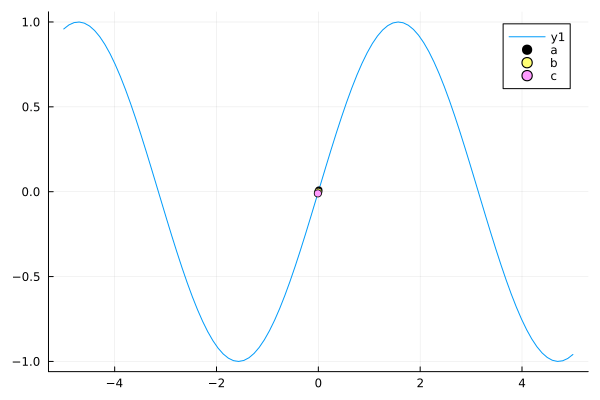

In [5]:
gif(anim, fps = 4)

2. **Fibonnaci Search**
    1. In this type of search we essentially recursively call into fibonacci sequence to solve the problem breaking it into sub problems to be solved (this breaks the interval down by a third each step). 
    $$
F_n
= 
\begin{cases}
1 \text{ if } n <= 2\\
F_{n-1} + F_{n-2} \text{ otherwise }
\end{cases}
$$
    2. Alternatively you can solve the fibonacci search by utilizing *binet's formula*
        
        $F_n = (Φ^n - (1 - Φ)^n) / √(5)$ where $Φ = (1 + √(5)) / 2 = 1.61803$ which is the *golden ratio*
        
        $s = F_n / F_{n-1} = (1 - √(5)) / (1 + √(5)) = -0.382$ where s is the ratio beween current and prior fibonacci values

In [6]:
function fibonacci_search1(func, a, b, n)
    # Calculate the Fibonacci sequence up to n terms
    fib = [0, 1]
    for i in 3:n
        push!(fib, fib[end] + fib[end-1])
    end
    
    update_x1(a, b, i) = a + (b - a) * (fib[i - 2] / fib[i])
    update_x2(a, b, i) = a + (b - a) * (fib[i - 1] / fib[i])
    
    # Define search points within the interval
    x1 = update_x1(a, b, n)
    x2 = update_x2(a, b, n)
    
    println("Initial ratios ", (fib[n - 2] / fib[n]), " ", (fib[n - 1] / fib[n]))
    
    f1 = func(x1)
    f2 = func(x2)
    
    rng = range(a, b, 100)

    anim = @animate for i in n-1:-1:3
        plot_f(func, rng, [x1, x2], [f1, f2])
        
        if f1 < f2
            f2, x2, b = x2, x1, f1
            x1 = update_x1(a, b, i)
            f1 = func(x1)
        else
            f1, x1, a = x1, x2, f2
            x2 = update_x2(a, b, i)
            f2 = func(x2)
        end
    end

    # Final step with only two remaining points
    x3 = (a + b) / 2
    f3 = func(x3)

    return f1 < f1 ? (x1, f1) : (x2, f2), anim
end

fibonacci_search1 (generic function with 1 method)

In [7]:
f(x) = x^2 + 5x + 6  # Example quadratic function

a = -10.0  # Start of the interval
b = 10.0   # End of the interval
n = 10     # Number of Fibonacci terms to use

(min_x, min_value), anim = fibonacci_search1(f, a, b, n)
println("Minimum at x = $min_x, f(x) = $min_value")

Initial ratios 0.38235294117647056 0.6176470588235294
Minimum at x = -0.883465150766189, f(x) = 2.36318491878738


[ Info: Saved animation to /Users/dakre/work/JuliaOptiMize/tmp.gif


Plots.AnimatedGif("/Users/dakre/work/JuliaOptiMize/tmp.gif")
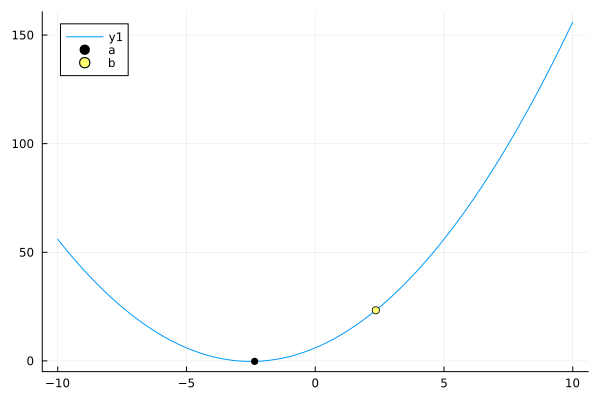

In [8]:
gif(anim, fps = 4)